In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


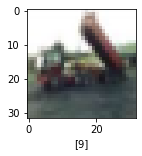

In [7]:
plot_sample(x_train,y_train,2)

In [8]:
#normalize
x_train=x_train/255
x_test=x_test/255

In [9]:
#model
cnn=models.Sequential()

#feature extraction
cnn.add(layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D(2,2))
                       
cnn.add(layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
cnn.add(layers.MaxPooling2D(2,2))

#classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [11]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
cnn.fit(x_train,y_train,epochs=25,validation_data=(x_train,y_train))

Epoch 1/25
1563/1563 [==============================] - 103s 65ms/step - loss: 1.5076 - accuracy: 0.4560 - val_loss: 1.2263 - val_accuracy: 0.5655
Epoch 2/25
1563/1563 [==============================] - 109s 70ms/step - loss: 1.1453 - accuracy: 0.5976 - val_loss: 1.0222 - val_accuracy: 0.6456
Epoch 3/25
1563/1563 [==============================] - 111s 71ms/step - loss: 1.0119 - accuracy: 0.6483 - val_loss: 0.9348 - val_accuracy: 0.6755
Epoch 4/25
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9270 - accuracy: 0.6795 - val_loss: 0.8889 - val_accuracy: 0.6906
Epoch 5/25
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8660 - accuracy: 0.6983 - val_loss: 0.7788 - val_accuracy: 0.7306
Epoch 6/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8148 - accuracy: 0.7188 - val_loss: 0.7730 - val_accuracy: 0.7267
Epoch 7/25
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7727 - accuracy: 0.7315 - val_loss: 0.7

In [13]:
y_pred=cnn.predict(x_test)

In [14]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.3094 - accuracy: 0.6850


[1.3094230890274048, 0.6850000023841858]

In [15]:
y_test=y_test.reshape(-1)
y_pred=cnn.predict(x_test)

In [16]:
y_classes=[np.argmax(element) for element in y_pred]
print("classification report :\n",classification_report(y_test,y_classes))

classification report :
               precision    recall  f1-score   support

           0       0.62      0.79      0.69      1000
           1       0.85      0.76      0.80      1000
           2       0.62      0.56      0.59      1000
           3       0.52      0.55      0.53      1000
           4       0.62      0.66      0.64      1000
           5       0.62      0.57      0.59      1000
           6       0.78      0.72      0.75      1000
           7       0.69      0.75      0.72      1000
           8       0.83      0.72      0.77      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

